* EMPLOYEE TURN OVER PREDICTION PORJECT USING MACHINE LEARNING

#importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

C:\Users\surya\AppData\Local\Temp\ipykernel_12096\2099481659.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('HR.csv')
df.shape

(14999, 10)

In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
 len(df['average_montly_hours'].unique())

215

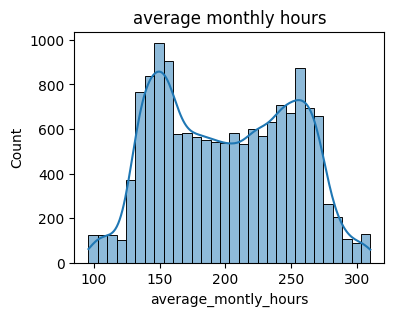

In [6]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x=df['average_montly_hours'],kde=True)
plt.title('average monthly hours')
plt.show()


In [7]:
df['number_project'].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

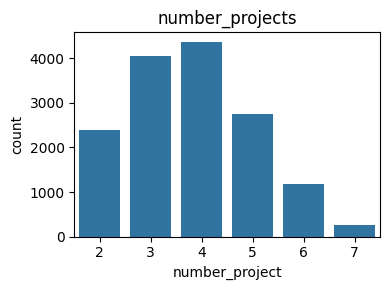

In [8]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x=df['number_project'])
plt.title('number_projects')
plt.tight_layout()
plt.show()

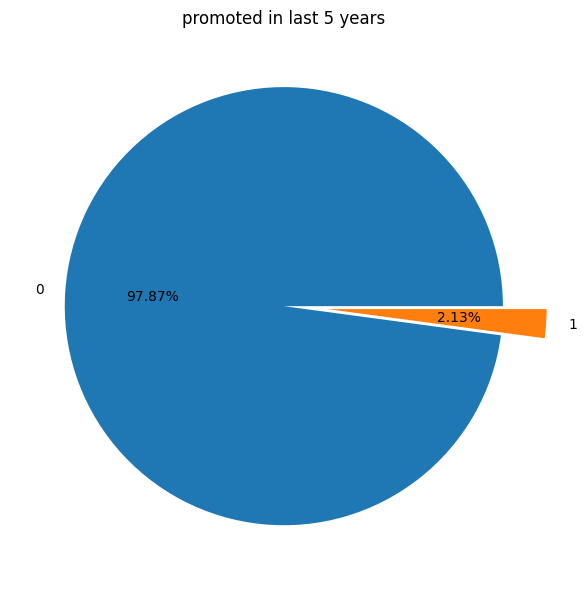

In [9]:
 plt.figure(figsize=(6,6))
 plt.pie(x=df['promotion_last_5years'].value_counts(),labels=[0,1],autopct='%1.2f%%',explode=[0,0.2])
plt.title('promoted in last 5 years')
plt.tight_layout()
plt.show()

In [10]:
 labels=df['Work_accident'].value_counts().index.tolist()
labels

[0, 1]

In [11]:
labels=['work accident'if i==1 else 'no work accident' for i in labels]
labels

['no work accident', 'work accident']

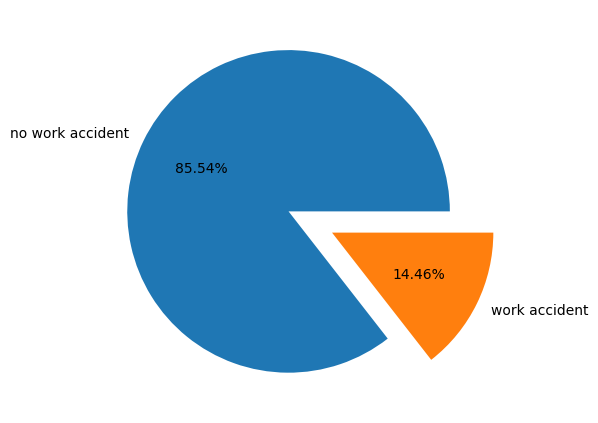

In [12]:
plt.figure(figsize=(6,6))
plt.pie(x=df['Work_accident'].value_counts(),labels=labels,autopct='%1.2f%%',explode=[0,0.3])
plt.tight_layout()
plt.show()

In [13]:
labels=df['time_spend_company'].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

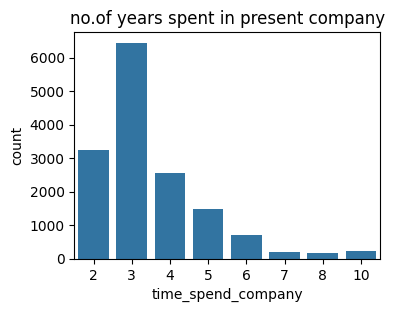

In [14]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x=df['time_spend_company'])
plt.tight_layout()
plt.title('no.of years spent in present company')
plt.show()

In [15]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

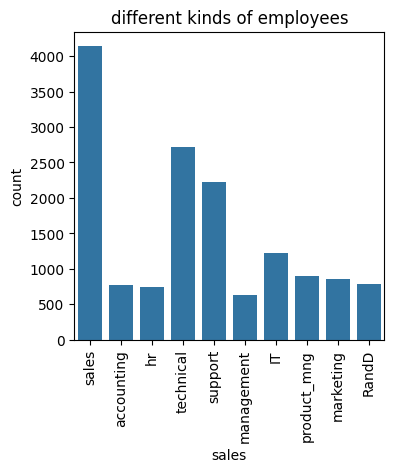

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='sales')
plt.title('different kinds of employees')
plt.xticks(rotation=90)
plt.show()

In [17]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

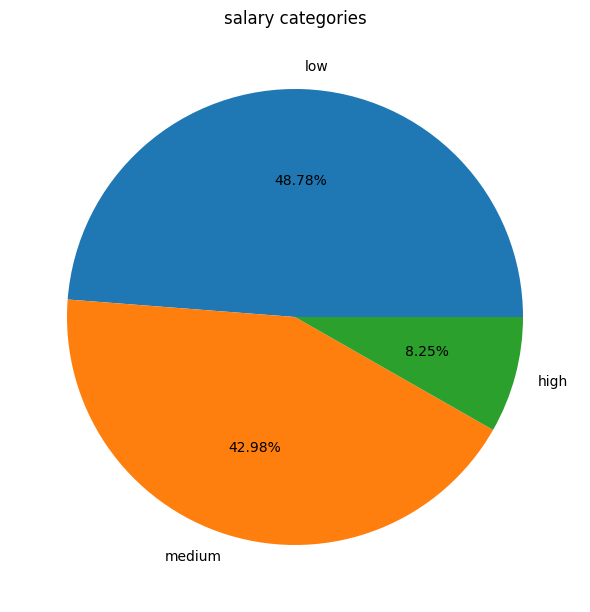

In [18]:
plt.figure(figsize=(6,6))
plt.pie(x=df['salary'].value_counts(),labels=df['salary'].unique(),autopct='%1.2f%%')
plt.tight_layout()
plt.title('salary categories')
plt.show()


 DATA PREPROCESSING

In [19]:
df.rename(columns={'salary':'salary_level','sales':'department'},inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


ONE HOT ENCODING---
.changing ['department','salary_level'] (categorial data to numerical data)

In [21]:
ohe=OneHotEncoder()

In [22]:
feature_array=ohe.fit_transform(df[['salary_level','department']]).toarray()

In [23]:
print(feature_array)

[[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [24]:
ohe.categories_

[array(['high', 'low', 'medium'], dtype=object),
 array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
        'product_mng', 'sales', 'support', 'technical'], dtype=object)]

In [25]:
feature_labels=np.array(['high', 'low', 'medium','IT', 'RandD', 'accounting', 'hr', 'management', 'marketing','product_mng', 'sales', 'support', 'technical'])

In [26]:
print(feature_labels)

['high' 'low' 'medium' 'IT' 'RandD' 'accounting' 'hr' 'management'
 'marketing' 'product_mng' 'sales' 'support' 'technical']


In [27]:
features=pd.DataFrame(feature_array,columns=feature_labels)

In [28]:
features.head()

,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df=pd.concat([df,features],axis=1)

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
df.drop(['department','salary_level'],inplace=True,axis='columns')

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical'],
      dtype='object')

In [34]:
X=df.drop('left',axis=1)
y=df['left']

In [35]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

*test and train split data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [39]:
X_train.shape

(11999, 20)

In [40]:
X_test.shape

(3000, 20)

* TRAIN MODEL

In [41]:
 from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
logreg=LogisticRegression(max_iter=2000)


In [43]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [44]:
logreg.predict(X_test[:5])

array([0, 0, 1, 0, 0], dtype=int64)

In [45]:
logreg_predictions=logreg.predict(X_test)

In [46]:
accuracy_score(y_test,logreg_predictions)

0.7946666666666666

In [47]:
print(classification_report(y_test,logreg_predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2285
           1       0.63      0.34      0.44       715

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



In [48]:
cm=confusion_matrix(y_test,logreg_predictions)
cm

array([[2139,  146],
       [ 470,  245]], dtype=int64)

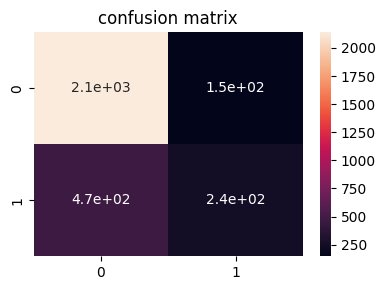

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True)
plt.title('confusion matrix')
plt.tight_layout()

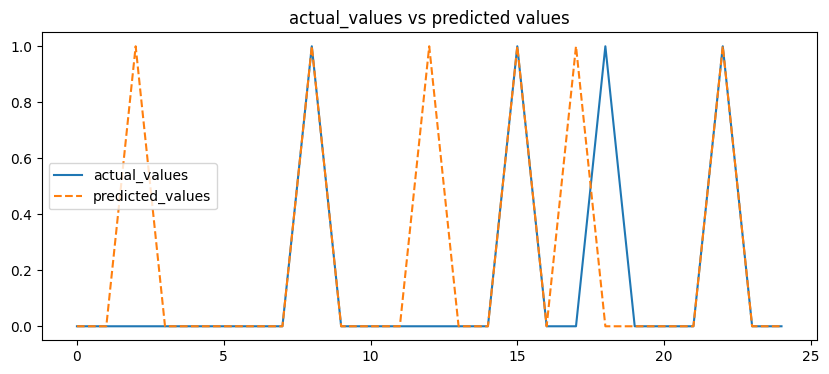

In [66]:
plt.figure(figsize=(10,4))
plt.plot(range(0,25),y_test[:25],label='actual_values')
plt.plot(range(0,25),logreg_predictions[:25],label='predicted_values',linestyle='--')
plt.title('actual_values vs predicted values')
plt.legend()
plt.show()

accuracy of logistic_regression_model=0.7946666666666666

* RANDOMFOREST_REGRESSOR

In [62]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [63]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
model.score(X_test,y_test)

0.9375892337426389

In [65]:
predictions=model.predict(X_test)

In [66]:
predictions=[0 if i<1 else 1 for i in predictions]
predictions=np.array(predictions)
accuracy_score(y_test,predictions)

0.9596666666666667

In [67]:
print('predictions=',predictions[:25].reshape(1,25))
print('actual_values=',np.array(y_test[:25]))


predictions= [[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
actual_values= [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


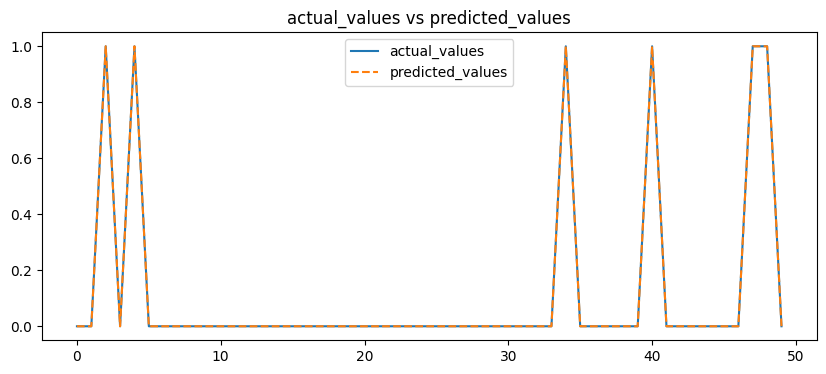

In [68]:
plt.figure(figsize=(10,4))
plt.plot(range(0,50),y_test[:50],label="actual_values")
plt.plot(range(0,50),predictions[:50],label='predicted_values',linestyle='--')
plt.title("actual_values vs predicted_values")
plt.legend()
plt.show()

* CLASSIFICATION REPORT

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2314
           1       0.99      0.83      0.90       686

    accuracy                           0.96      3000
   macro avg       0.97      0.91      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [70]:
print(confusion_matrix(y_test,predictions))

[[2311    3]
 [ 118  568]]


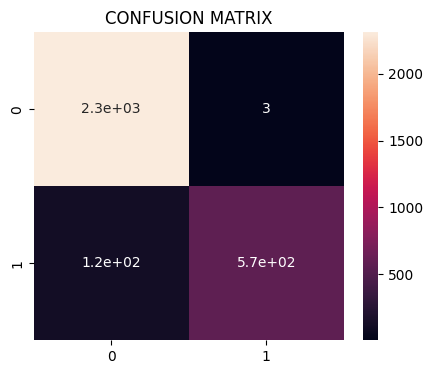

In [71]:
cmm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cmm,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()

In [72]:
future_conditions=pd.DataFrame(predictions,columns=['stay/left'])
future_conditions.head()

,stay/left
0,0
1,0
2,1
3,0
4,1


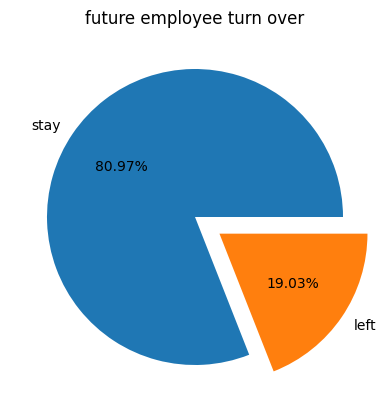

In [73]:
plt.figure(figsize=(4,4))
plt.pie(x=future_conditions.value_counts(),labels=['stay','left'],autopct='%1.2f%%',explode=[0,0.2])
plt.tight_layout()
plt.title('future employee turn over')
plt.show()

* ACCURACY_SCORE

In [74]:
accuracy_score(y_test,predictions)

0.9596666666666667